In [1]:
import pandas as pd
import numpy as np                                  #biblioteca para a função exponencial
#from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from lmfit import Model


In [2]:
dados = pd.read_csv("hdom_output.csv")

In [3]:
display(dados)

#print(dados.info())

,parcela_id,idade,hdom
0,1,3,15.009
1,1,4,22.789
2,1,5,24.904
3,1,6,25.900
4,2,3,15.730
...,...,...,...
115,29,6,24.132
116,30,3,15.923
117,30,4,20.121
118,30,5,21.985


In [5]:
# Função de Gompertz
def gompertz(x, a, b, c):
    return a * np.exp(-np.exp(b - c * x))

# Criação de um modelo usando a função de Gompertz
model = Model(gompertz)

# Valores iniciais para os parâmetros
params = model.make_params(a=26, b=4, c=1)

# Ajuste do modelo aos dados
result = model.fit(dados["hdom"], params, x=dados["idade"])

# Valores preditos usando o modelo ajustado
y_predito = result.best_fit


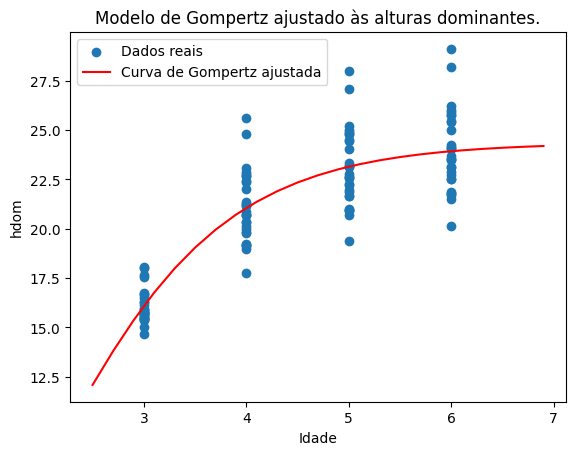

[[Model]]
    Model(gompertz)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 40
    # data points      = 120
    # variables        = 3
    chi-square         = 339.582819
    reduced chi-square = 2.90241725
    Akaike info crit   = 130.827134
    Bayesian info crit = 139.189609
    R-squared          = 0.76791373
[[Variables]]
    a:  24.3648097 +/- 0.46913432 (1.93%) (init = 26)
    b:  2.26128670 +/- 0.47459909 (20.99%) (init = 4)
    c:  1.04618201 +/- 0.16527807 (15.80%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(b, c) = +0.9931
    C(a, c) = -0.8624
    C(a, b) = -0.8174


In [10]:
# Importar bibliotecas e definir a função de Gompertz como antes...

# Plot dos dados reais e da curva ajustada
plt.scatter(dados["idade"], dados["hdom"], label='Dados reais')
x_range = np.arange(2.5, 7, 0.2)  # Intervalo para o eixo x
y_predito_range = gompertz(x_range, result.best_values['a'], result.best_values['b'], result.best_values['c'])
plt.plot(x_range, y_predito_range, label='Curva de Gompertz ajustada', color='red')
plt.xlabel('Idade')
plt.ylabel('hdom')
plt.legend()

plt.title('Modelo de Gompertz ajustado às alturas dominantes.')

# Salve o gráfico como uma imagem PNG
plt.savefig('grafico_ajuste_gompertz.png')

plt.show()

print(result.fit_report())


In [8]:
a = result.params['a'].value
b = result.params['b'].value
c = result.params['c'].value

#Gompertz Relation: y=a*exp(-exp(b-cx))

dados["Ht_estimado"] = a*np.exp(-np.exp(b-c*(dados["idade"])))

dados["Fator"] = dados["hdom"]/dados["Ht_estimado"]

display(dados)

,parcela_id,idade,hdom,Ht_estimado,Fator
0,1,3,15.009,16.074250,0.933729
1,1,4,22.789,21.052863,1.082466
2,1,5,24.904,23.145890,1.075958
3,1,6,25.900,23.929486,1.082347
4,2,3,15.730,16.074250,0.978584
...,...,...,...,...,...
115,29,6,24.132,23.929486,1.008463
116,30,3,15.923,16.074250,0.990591
117,30,4,20.121,21.052863,0.955737
118,30,5,21.985,23.145890,0.949845


In [9]:
fator_max = dados["Fator"].max() #Fator máximo
fator_min = dados["Fator"].min() #Fator mínimo

hd7 = a*np.exp(-np.exp(b-c*(7)))

lim_max = hd7*fator_max

lim_min = hd7*fator_min

amplitude = lim_max-lim_min

# Número de classes

h = int(3)

import math

nclasse = math.ceil(amplitude / h)


print("Fator maximo: ",fator_max)
print("Fator mínimo: ",fator_min)
print("Altura estimada para idade = 7: ",hd7)
print("Limite máximo: ",lim_max)
print("Limite mínimo: ",lim_min)
print("Amplitude: ",amplitude)
print("Número de classes: ",nclasse)



Fator maximo:  1.2168251156111052
Fator mínimo:  0.8372976784741466
Altura estimada para idade = 7:  24.21099589028474
Limite máximo:  29.46054787325572
Limite mínimo:  20.271810652482515
Amplitude:  9.188737220773206
Número de classes:  4


In [11]:
# Tabela com índices de sítio

tab = pd.DataFrame(columns=["Site","LI","LS","IS"])

site = int()

site = nclasse

tab.at[1,"LI"]=lim_min
tab.at[1,"LS"]=lim_min+h

#i = int()
#i=1

for i in range(1,(nclasse+1)):
    #print(i)
    tab.at[i,"Site"]=site
    site = site-1
    #print(site)
    
    if i==1:
        tab.at[1,"LI"]=lim_min
        tab.at[1,"LS"]=lim_min+h
    else:
        tab.at[i,"LI"]=tab.at[i-1,"LS"]
        tab.at[i,"LS"]=tab.at[i,"LI"]+h
    
    tab.at[i,"IS"]=tab.at[i,"LI"]+(h/2)
    
    

#tab["Site"] = ("IV","III","II","I")

tab["LI"]=tab.LI.astype(int)
tab["LS"]=tab.LS.astype(int)


display(tab)

,Site,LI,LS,IS
1,4,20,23,21.771811
2,3,23,26,24.771811
3,2,26,29,27.771811
4,1,29,32,30.771811


In [12]:
# Fatores do limites

fatores = pd.DataFrame()

fatores.at[1,1] = tab.at[1,"LI"]

for i in range(1,(nclasse+1)):
    
    fatores.at[1,i+1] = tab.at[i,"LS"]
    fatores.at[1,1] = tab.at[1,"LI"]
    
for i in range(1,(nclasse+2)):
    
    fatores.at[2,i]=fatores.at[1,i]/hd7

display(fatores)

,1,2,3,4,5
1,20.000000,23.000000,26.000000,29.000000,32.000000
2,0.826071,0.949982,1.073892,1.197803,1.321713


In [13]:
# Limites por parcela

print(fatores.at[2,1])

for i in range(1,nclasse+2):

    dados[i]=dados["Ht_estimado"]*fatores.at[2,i]


display(dados)

0.8260709344891299


,parcela_id,idade,hdom,Ht_estimado,Fator,1,2,3,4,5
0,1,3,15.009,16.074250,0.933729,13.278471,15.270241,17.262012,19.253783,21.245553
1,1,4,22.789,21.052863,1.082466,17.391158,19.999832,22.608506,25.217179,27.825853
2,1,5,24.904,23.145890,1.075958,19.120147,21.988169,24.856191,27.724213,30.592235
3,1,6,25.900,23.929486,1.082347,19.767453,22.732571,25.697689,28.662807,31.627925
4,2,3,15.730,16.074250,0.978584,13.278471,15.270241,17.262012,19.253783,21.245553
...,...,...,...,...,...,...,...,...,...,...
115,29,6,24.132,23.929486,1.008463,19.767453,22.732571,25.697689,28.662807,31.627925
116,30,3,15.923,16.074250,0.990591,13.278471,15.270241,17.262012,19.253783,21.245553
117,30,4,20.121,21.052863,0.955737,17.391158,19.999832,22.608506,25.217179,27.825853
118,30,5,21.985,23.145890,0.949845,19.120147,21.988169,24.856191,27.724213,30.592235


In [14]:
#Classificar parcelas

#display(dados[1])

for i in range(0,len(dados.index)):
    #print(i)
    
    if dados.at[i,"hdom"]<dados.at[i,2]:
        #print(i)
        dados.at[i,"classificação"] = 4
    
    else:
        if dados.at[i,"hdom"]<dados.at[i,3]:
            dados.at[i,"classificação"] = 3
        else:
            if dados.at[i,"hdom"]<dados.at[i,4]:
                dados.at[i,"classificação"] = 2
            
            else:
                dados.at[i,"classificação"] = 1



#if dados["Ht estimado"]>dados[1]:

#if dados["Ht estimado"] <= dados["Ht dom"]:
#    print(i)
#    dados["Classe de sítio"] = 4
#else:
#    dados["Classe de sítio"] = 1

display(dados)

,parcela_id,idade,hdom,Ht_estimado,Fator,1,2,3,4,5,classificação
0,1,3,15.009,16.074250,0.933729,13.278471,15.270241,17.262012,19.253783,21.245553,4.0
1,1,4,22.789,21.052863,1.082466,17.391158,19.999832,22.608506,25.217179,27.825853,2.0
2,1,5,24.904,23.145890,1.075958,19.120147,21.988169,24.856191,27.724213,30.592235,2.0
3,1,6,25.900,23.929486,1.082347,19.767453,22.732571,25.697689,28.662807,31.627925,2.0
4,2,3,15.730,16.074250,0.978584,13.278471,15.270241,17.262012,19.253783,21.245553,3.0
...,...,...,...,...,...,...,...,...,...,...,...
115,29,6,24.132,23.929486,1.008463,19.767453,22.732571,25.697689,28.662807,31.627925,3.0
116,30,3,15.923,16.074250,0.990591,13.278471,15.270241,17.262012,19.253783,21.245553,3.0
117,30,4,20.121,21.052863,0.955737,17.391158,19.999832,22.608506,25.217179,27.825853,3.0
118,30,5,21.985,23.145890,0.949845,19.120147,21.988169,24.856191,27.724213,30.592235,4.0


In [15]:
#dados.at[1,"reclass"] = " "

for i in range(3,len(dados.index)+1,4):
    
    if dados.at[i,"classificação"] >= dados.at[i-1,"classificação"]:
        dados.at[i,"reclass"] = dados.at[i,"classificação"]
    
    else:
        dados.at[i,"reclass"] = dados.at[i-1,"classificação"]
        
    
    print(dados.at[i,"parcela_id"],dados.at[i,"idade"],i,dados.at[i,"classificação"])
    
display(dados)

1 6 3 2.0
2 6 7 3.0
3 6 11 3.0
4 6 15 3.0
5 6 19 4.0
6 6 23 3.0
7 6 27 2.0
8 6 31 2.0
9 6 35 2.0
10 6 39 1.0
11 6 43 2.0
12 6 47 2.0
13 6 51 3.0
14 6 55 3.0
15 6 59 3.0
16 6 63 3.0
17 6 67 3.0
18 6 71 4.0
19 6 75 4.0
20 6 79 3.0
21 6 83 3.0
22 6 87 4.0
23 6 91 4.0
24 6 95 3.0
25 6 99 4.0
26 6 103 4.0
27 6 107 4.0
28 6 111 4.0
29 6 115 3.0
30 6 119 3.0


,parcela_id,idade,hdom,Ht_estimado,Fator,1,2,3,4,5,classificação,reclass
0,1,3,15.009,16.074250,0.933729,13.278471,15.270241,17.262012,19.253783,21.245553,4.0,NaN
1,1,4,22.789,21.052863,1.082466,17.391158,19.999832,22.608506,25.217179,27.825853,2.0,NaN
2,1,5,24.904,23.145890,1.075958,19.120147,21.988169,24.856191,27.724213,30.592235,2.0,NaN
3,1,6,25.900,23.929486,1.082347,19.767453,22.732571,25.697689,28.662807,31.627925,2.0,2.0
4,2,3,15.730,16.074250,0.978584,13.278471,15.270241,17.262012,19.253783,21.245553,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
115,29,6,24.132,23.929486,1.008463,19.767453,22.732571,25.697689,28.662807,31.627925,3.0,3.0
116,30,3,15.923,16.074250,0.990591,13.278471,15.270241,17.262012,19.253783,21.245553,3.0,NaN
117,30,4,20.121,21.052863,0.955737,17.391158,19.999832,22.608506,25.217179,27.825853,3.0,NaN
118,30,5,21.985,23.145890,0.949845,19.120147,21.988169,24.856191,27.724213,30.592235,4.0,NaN


In [16]:
# Reclassificar se não houver classe I

print("Parcelas com classificação 1:")
display(dados[dados["reclass"]==1])

print("Parcelas com classificação 2:")
display(dados[dados["reclass"]==2])


if dados[dados["reclass"]==1]["reclass"].count()==0:
    
    for i in range(3,len(dados.index)+1,4):
        
        dados.at[i,"reclass"] = dados.at[i,"reclass"]-1
    
    if dados[dados["reclass"]==2]["reclass"].count()==0:
        
        for i in range(3,len(dados.index)+1,4):
            
            dados.at[i,"reclass"] = dados.at[i,"reclass"]-1
            
else:
    print("Não precisou de reclassificação")
    

#dados[dados["Parcela"]==10]

Parcelas com classificação 1:


,parcela_id,idade,hdom,Ht_estimado,Fator,1,2,3,4,5,classificação,reclass
39,10,6,29.118,23.929486,1.216825,19.767453,22.732571,25.697689,28.662807,31.627925,1.0,1.0


Parcelas com classificação 2:


,parcela_id,idade,hdom,Ht_estimado,Fator,1,2,3,4,5,classificação,reclass
3,1,6,25.900,23.929486,1.082347,19.767453,22.732571,25.697689,28.662807,31.627925,2.0,2.0
31,8,6,26.223,23.929486,1.095845,19.767453,22.732571,25.697689,28.662807,31.627925,2.0,2.0
35,9,6,25.996,23.929486,1.086358,19.767453,22.732571,25.697689,28.662807,31.627925,2.0,2.0
43,11,6,28.195,23.929486,1.178253,19.767453,22.732571,25.697689,28.662807,31.627925,2.0,2.0


Não precisou de reclassificação


In [17]:
# Índice de sítio por parcela e idade

for i in range(3,len(dados.index)+1,4):
    
    dados.at[i-3,"Classe"] = dados.at[i,"reclass"]
    dados.at[i-2,"Classe"] = dados.at[i,"reclass"]
    dados.at[i-1,"Classe"] = dados.at[i,"reclass"]
    dados.at[i,"Classe"] = dados.at[i,"reclass"]
    
    for j in range(1,len(tab.index)+1):
    
        if dados.at[i,"reclass"] == tab.at[j,"Site"]:
            dados.at[i-3,"IS"] = tab.at[j,"IS"]
            dados.at[i-2,"IS"] = tab.at[j,"IS"]
            dados.at[i-1,"IS"] = tab.at[j,"IS"]
            dados.at[i,"IS"] = tab.at[j,"IS"]

dados["Classe"]=dados.Classe.astype(int)

display(tab)
display(dados)


,Site,LI,LS,IS
1,4,20,23,21.771811
2,3,23,26,24.771811
3,2,26,29,27.771811
4,1,29,32,30.771811


,parcela_id,idade,hdom,Ht_estimado,Fator,1,2,3,4,5,classificação,reclass,Classe,IS
0,1,3,15.009,16.074250,0.933729,13.278471,15.270241,17.262012,19.253783,21.245553,4.0,NaN,2,27.771811
1,1,4,22.789,21.052863,1.082466,17.391158,19.999832,22.608506,25.217179,27.825853,2.0,NaN,2,27.771811
2,1,5,24.904,23.145890,1.075958,19.120147,21.988169,24.856191,27.724213,30.592235,2.0,NaN,2,27.771811
3,1,6,25.900,23.929486,1.082347,19.767453,22.732571,25.697689,28.662807,31.627925,2.0,2.0,2,27.771811
4,2,3,15.730,16.074250,0.978584,13.278471,15.270241,17.262012,19.253783,21.245553,3.0,NaN,3,24.771811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,29,6,24.132,23.929486,1.008463,19.767453,22.732571,25.697689,28.662807,31.627925,3.0,3.0,3,24.771811
116,30,3,15.923,16.074250,0.990591,13.278471,15.270241,17.262012,19.253783,21.245553,3.0,NaN,4,21.771811
117,30,4,20.121,21.052863,0.955737,17.391158,19.999832,22.608506,25.217179,27.825853,3.0,NaN,4,21.771811
118,30,5,21.985,23.145890,0.949845,19.120147,21.988169,24.856191,27.724213,30.592235,4.0,NaN,4,21.771811


In [19]:
# Consulta
display(dados[dados["parcela_id"]==10])

,parcela_id,idade,hdom,Ht_estimado,Fator,1,2,3,4,5,classificação,reclass,Classe,IS
36,10,3,17.636,16.074250,1.097159,13.278471,15.270241,17.262012,19.253783,21.245553,2.0,NaN,1,30.771811
37,10,4,25.616,21.052863,1.216747,17.391158,19.999832,22.608506,25.217179,27.825853,1.0,NaN,1,30.771811
38,10,5,27.998,23.145890,1.209632,19.120147,21.988169,24.856191,27.724213,30.592235,1.0,NaN,1,30.771811
39,10,6,29.118,23.929486,1.216825,19.767453,22.732571,25.697689,28.662807,31.627925,1.0,1.0,1,30.771811


In [20]:
# exportar

dados.to_excel("sitio.xlsx")  

dados.to_csv('sitio.csv', index = False) 

#writer = pd.ExcelWriter("C:/Users/cardi/Documents/sitio.xlsx", engine='xlsxwriter')

#dados.to_excel(writer,sheet_name='classificação',float_format="%.2f")

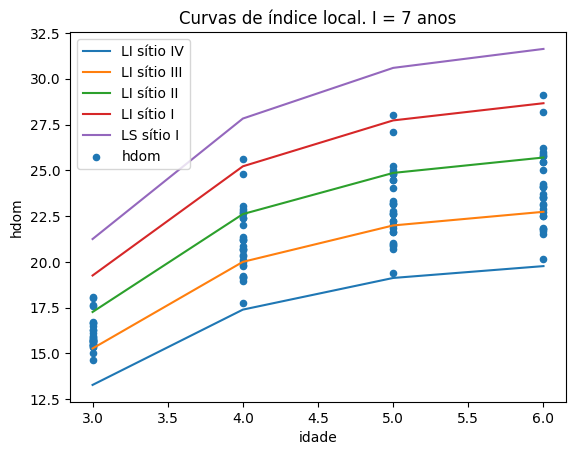

In [25]:
# Gráfico

dados = dados.sort_values(by='idade')

ax = plt.gca()


dados.plot.line(x = 'idade', y = 1, ax = ax, label = 'LI sítio IV')
dados.plot.line(x = 'idade', y = 2, ax = ax, label = 'LI sítio III')
dados.plot.line(x = 'idade', y = 3, ax = ax, label = 'LI sítio II')
dados.plot.line(x = 'idade', y = 4, ax = ax, label = 'LI sítio I')
dados.plot.line(x = 'idade', y = 5, ax = ax, label = 'LS sítio I')
dados.plot.scatter(x = 'idade', y = 'hdom', ax = ax, label = 'hdom')

plt.title('Curvas de índice local. I = 7 anos')
#plt.text(3, 0, 'LI = limite inferior, LS = limite superior', fontsize=10, ha='center')
plt.savefig('grafico_sitio.png')
